In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [4]:
os.chdir('C:/Users/jwolf/Documents/MEGA/03_Doutoramento/08_Apresentações_publicações/E-Planning')

In [18]:
df_capacitated = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="Capacitated_facility", header=0,\
             dtype= {'SubSection': str})

In [51]:
#df_capacitated[-1:]
df_capacitated = df_capacitated[:-1]

In [136]:
df_capacitated.head()

,SubSection,School,Capacity,Alunos_alocados,Unnamed: 4,Custo,Dist,per_alunos,per_dist,per_cum_pessoas,per_cum_distancias
0,1180600225,1.180600e+09,225.0,1.745890,NaN,0.000000,0.000000,0.001982,0.000000,0.001982,0.000000
1,1180700206,1.180700e+09,225.0,1.163920,NaN,0.000000,0.000000,0.001321,0.000000,0.003303,0.000000
2,1181000301,1.181000e+09,225.0,0.775949,NaN,0.000000,0.000000,0.000881,0.000000,0.004183,0.000000
3,1181000123,1.181000e+09,225.0,0.969936,NaN,322.990207,0.498442,0.001101,0.000175,0.005284,0.000175
4,1180700304,1.180700e+09,225.0,2.133860,NaN,352.930114,0.544645,0.002422,0.000191,0.007706,0.000366


[Text(0,0,'Sample1'), Text(0,0,'Sample2')]

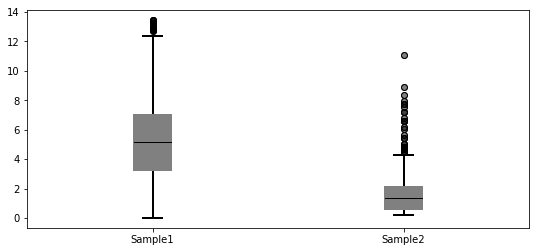

In [135]:
data_to_plot = (df_capacitated.Dist, df_capacitated.Alunos_alocados)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 4))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)


# add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='grey', linewidth=2)
    # change fill color
    box.set( facecolor = 'grey' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=1)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
   
ax.set_xticklabels(['Sample1', 'Sample2'])

#Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

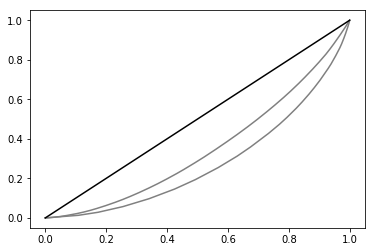

In [145]:
scaled_sum = df_capacitated.Dist.cumsum() / df_capacitated.Dist.sum()
ordered = df_capacitated.Alunos_alocados.sort_values()
scaled_sum_2 = ordered.cumsum() / ordered.sum()

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
plt.plot(np.linspace(0.0, 1.0, scaled_sum_2.size), scaled_sum_2, color = 'grey')

# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], color = 'black')
plt.show()

